<a href="https://colab.research.google.com/github/mganesh1183/PDI-demo/blob/main/pdi_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
os.chdir('/content/drive/MyDrive/newdataset')

In [10]:
pip install tensorflow

In [9]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input
#from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from sklearn.metrics import classification_report
import time

In [11]:
import os

directory = '/content/drive/MyDrive/newdataset/train'
contents = os.listdir(directory)
num_of_dirs = len([name for name in contents if os.path.isdir(os.path.join(directory, name))])

print("Contents of the directory:")
for item in contents:
    print(item)

print(f"\nNumber of directories: {num_of_dirs}")

Contents of the directory:
Potato___healthy
Potato___Late_blight
Grape___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___healthy

Number of directories: 6


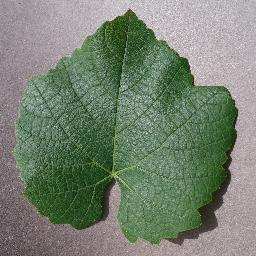

In [17]:
from PIL import Image
import os

# Define the directory path
directory_path = '/content/drive/MyDrive/newdataset/test/Grape___healthy'

# List all files in the directory
file_names = os.listdir(directory_path)

# Load images from the directory
images = []
for file_name in file_names:
    if file_name.endswith('.png') or file_name.endswith('.JPG') or file_name.endswith('.jpeg'):
        image_path = os.path.join(directory_path, file_name)
        image = Image.open(image_path)
        images.append(image)

# Process the images as required
# ...

# Example: Showing the first image
if images:
    #images[0].show()
    display(images[0])
else:
    print("No images found in the directory.")

In [18]:
batch_size = 128
num_epochs = 10
image_size = (139, 139)
num_classes = 6

In [20]:
# Load the InceptionV3 model
image_input = Input(shape=(*image_size, 3))
inception_model = InceptionV3(input_tensor=image_input, weights='imagenet', include_top=False)

In [21]:
# Add a new classification layer
x = inception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
class_outputs = Dense(num_classes, activation='softmax')(x)

In [ ]:
# Create the model
model = Model(inputs=inception_model.input, outputs=class_outputs)

# Compile the model
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Load the training data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_dataset = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/newdataset/train',
    target_size=(139, 139),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the validation data
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_dataset = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/newdataset/train',
    target_size=(139, 139),
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model and store the history
history = model.fit(train_dataset, epochs=num_epochs, validation_data=val_dataset)

# Evaluate the model on the test data
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_dataset = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/newdataset/test',
    target_size=(139, 139),
    batch_size=batch_size,
    class_mode='categorical'
)

# Save the model
model.save('plant_disease_model_inception.h5')

Found 7711 images belonging to 6 classes.
Found 7711 images belonging to 6 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 9/61 ━━━━━━━━━━━━━━━━━━━━ 20:22 24s/step - accuracy: 0.5514 - loss: 1.3485

In [ ]:
# Save the model in native Keras format
model.save('plant_disease_model_inception.keras')

import joblib

# Save the model using joblib
joblib.dump(model, 'plant_disease_model_inception.pkl')

In [ ]:
# Save model weights
model.save_weights('model_weights.weights.h5')

# Save model configurations (architecture, optimizer state, etc.)
model_config = model.get_config()
with open('model_config.pkl', 'wb') as config_file:
    joblib.dump(model_config, config_file)

In [ ]:
# Plot the metrics to visualize the training process
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_metrics(history)

In [ ]:
# Load the test data
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_dataset = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/test',
    target_size=(139, 139),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False to maintain the order for evaluation
)

# Evaluate the model on the test data
start_time = time.time()
evaluation_result = model.evaluate(test_dataset)
print("Time taken to evaluate the model: " + str(time.time() - start_time))

# Print the evaluation result
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

# Make predictions on the test set
y_pred = model.predict(test_dataset)
y_pred_bool = np.argmax(y_pred, axis=1)
# Get true labels directly from test_dataset
true_labels = test_dataset.labels

# Print the classification report
print(classification_report(true_labels, y_pred_bool, digits=4))

# Optionally, you can save the evaluation results for further analysis
np.savetxt("y_true.txt", true_labels, fmt="%d")
np.savetxt("y_pred.txt", y_pred_bool, fmt="%d")